In [1]:
import pandas as pds
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
tfile = pds.read_csv('energydata_complete.csv')

In [3]:
tfile.head(10)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.20,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.20,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.20,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.20,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.20,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
5,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.20,44.500000,19.79,44.933333,18.890000,...,17.000000,45.29,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484
6,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.20,44.500000,19.79,44.900000,18.890000,...,17.000000,45.29,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763
7,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.20,44.500000,19.73,44.900000,18.890000,...,17.000000,45.29,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890
8,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.20,44.433333,19.73,44.790000,18.890000,...,17.000000,45.29,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702
9,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.23,44.400000,19.79,44.863333,18.890000,...,17.000000,45.29,5.950000,734.300000,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314


In [4]:
tfile.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

<AxesSubplot:xlabel='T2', ylabel='T6'>

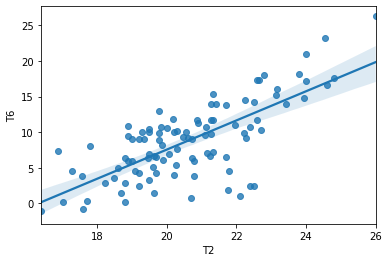

In [5]:
#Select 100 random samples from the dataset to visualize with.
lin_reg_1 = tfile[["T2","T6"]].sample(100,random_state=30)
lin_reg_1

#plot line of best fit using seaborn
sns.regplot(x= "T2" ,y= "T6" , data=lin_reg_1)

In [6]:
#Question 12 solution
from sklearn.linear_model import LinearRegression

Q12_model = LinearRegression()
X = tfile["T2"].values.reshape(-1,1)
y = tfile["T6"]

# fit the data into the linear regression model
Q12_model.fit(X, y)

# determine the R2 score
Q12_R2_score = Q12_model.score(X,y)
round(Q12_R2_score,2)

0.64

# Solutions to Question 13 through Question 20

In [7]:
#Initiate the required dataframe
p = tfile.drop(['date', 'lights'], axis = 1)
p.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

normalised_p   =   pds.DataFrame(scaler.fit_transform(p), columns=p.columns) 
features_p  =   normalised_p.drop(columns=['Appliances']) 
target   =   normalised_p[ 'Appliances']

#Split the data into training sets and testing sets
from sklearn.model_selection import train_test_split

p_train, p_test, y_train, y_test = train_test_split(features_p, target, test_size=0.3 ,random_state= 42)

#initiate model, fit data and make predictions

p_model = LinearRegression()
p_model.fit(p_train, y_train)
p_predicted = p_model.predict(p_test)

In [9]:
# Question 13 Solution
from sklearn.metrics import mean_absolute_error

p_mae = mean_absolute_error(y_test, p_predicted)
round(p_mae, 2)

0.05

In [10]:
# Question 14 solution
k = y_test - p_predicted
p_rss = round(np.sum(np.square(k)),2)
p_rss

45.35

In [11]:
#Question 15 solution
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, p_predicted)
p_rmse = round(np.sqrt(mse),3)
p_rmse

0.088

In [12]:
# Question 16 solution
coef_det = round(p_model.score(p_test, y_test),2)
coef_det

0.15

In [13]:
# Question 17 solution
p_weights = pds.Series(p_model.coef_, p_test.columns).sort_values()
p_weights = pds.DataFrame(p_weights).reset_index()
p_weights.columns = ["Features", "p_Linear_model_weights"]
ans = [(p_weights["Features"][0], p_weights["Features"][len(p_weights)-1])]
ans

[('RH_2', 'RH_1')]

In [14]:
# Question 18 solution
from sklearn.linear_model import Ridge

p_ridge_model = Ridge(alpha=0.4)
p_ridge_model.fit(p_train, y_train)
p_ridge_predicted = p_ridge_model.predict(p_test)

ridge_mse = mean_squared_error(y_test, p_ridge_predicted)
p_ridge_rmse = round(np.sqrt(ridge_mse),3)
p_ridge_rmse == p_rmse

True

In [15]:
# Question 19 solution
from sklearn.linear_model import Lasso

p_lasso_model = Lasso(alpha=0.001)
p_lasso_model.fit(p_train, y_train)

p_lasso_weights = pds.Series(p_lasso_model.coef_, p_test.columns).sort_values()
p_lasso_weights = pds.DataFrame(p_lasso_weights).reset_index()
p_lasso_weights.columns = ["Lasso_Features", "p_Lasso_model_weights"]
(p_lasso_weights.p_Lasso_model_weights != 0).sum()

4

In [16]:
# Question 20 solution
p_lasso_predicted = p_lasso_model.predict(p_test)

lasso_mse = mean_squared_error(y_test, p_lasso_predicted)
p_lasso_rmse = round(np.sqrt(lasso_mse),3)
p_lasso_rmse

0.094